In [23]:


%matplotlib inline
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, glsar
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.graphics.api import qqplot
df = pd.read_csv('mtd.csv')
from datetime import datetime



## My plan is to come up with a linear regression model that has significant predictive power, then run an ARIMA model on all of the variables found to be worth regressing on. Using the arima model predictions and the linear regression model, we may be able to get a picture of the future.

In [24]:
df.info()
df.rename(columns={'Sales_From_Items_>_250':'Sales_From_Items_over_250'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 17 columns):
Month                                 82 non-null int64
Rolling_12Month_Sales                 82 non-null int64
Call_Center_Sales                     82 non-null int64
Email_Sales                           82 non-null int64
Website_Sales                         82 non-null int64
Search_Sales                          82 non-null int64
Primary_Merchandise_Category_Sales    82 non-null int64
Other_Merchandise_Category_Sales      82 non-null int64
New_Merchandise_Sales                 82 non-null int64
Existing_Merchandise_Sales            82 non-null int64
Sales_From_Items_000_010              82 non-null int64
Sales_From_Items_010_020              82 non-null int64
Sales_From_Items_020_030              82 non-null int64
Sales_From_Items_030_050              82 non-null int64
Sales_From_Items_050_100              82 non-null int64
Sales_From_Items_100_250              82 non-null int64
S

In [25]:
mod = smf.ols(formula='Rolling_12Month_Sales ~ Call_Center_Sales + Email_Sales + Website_Sales + Search_Sales', data=df)

res = mod.fit()

print(res.summary())

                              OLS Regression Results                             
Dep. Variable:     Rolling_12Month_Sales   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 1.101e+16
Date:                   Mon, 16 Oct 2017   Prob (F-statistic):               0.00
Time:                           12:50:49   Log-Likelihood:                -71.745
No. Observations:                     82   AIC:                             153.5
Df Residuals:                         77   BIC:                             165.5
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercep

In [26]:
mod2 = smf.ols(formula='Rolling_12Month_Sales ~ Primary_Merchandise_Category_Sales + Other_Merchandise_Category_Sales', data=df)

res = mod2.fit()

print(res.summary())

                              OLS Regression Results                             
Dep. Variable:     Rolling_12Month_Sales   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 3.424e+16
Date:                   Mon, 16 Oct 2017   Prob (F-statistic):               0.00
Time:                           12:50:49   Log-Likelihood:                -54.698
No. Observations:                     82   AIC:                             115.4
Df Residuals:                         79   BIC:                             122.6
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------

In [27]:
mod3 = smf.ols(formula='Rolling_12Month_Sales ~  New_Merchandise_Sales + Existing_Merchandise_Sales', data=df)

res = mod3.fit()

print(res.summary())

                              OLS Regression Results                             
Dep. Variable:     Rolling_12Month_Sales   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 3.761e+16
Date:                   Mon, 16 Oct 2017   Prob (F-statistic):               0.00
Time:                           12:50:49   Log-Likelihood:                -50.849
No. Observations:                     82   AIC:                             107.7
Df Residuals:                         79   BIC:                             114.9
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------

In [28]:
mod4 = smf.ols(formula='Rolling_12Month_Sales ~ Sales_From_Items_000_010 + Sales_From_Items_010_020 + Sales_From_Items_020_030 + Sales_From_Items_030_050 + Sales_From_Items_050_100 + Sales_From_Items_100_250 + Sales_From_Items_over_250', data=df)

res = mod4.fit()

print(res.summary())

                              OLS Regression Results                             
Dep. Variable:     Rolling_12Month_Sales   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 2.782e+15
Date:                   Mon, 16 Oct 2017   Prob (F-statistic):               0.00
Time:                           12:50:49   Log-Likelihood:                -103.57
No. Observations:                     82   AIC:                             223.1
Df Residuals:                         74   BIC:                             242.4
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------

In [29]:
mod2 = smf.ols(formula='Rolling_12Month_Sales ~ Search_Sales + Primary_Merchandise_Category_Sales + Other_Merchandise_Category_Sales + New_Merchandise_Sales + Existing_Merchandise_Sales', data=df)

res = mod.fit()

print(res.summary())

                              OLS Regression Results                             
Dep. Variable:     Rolling_12Month_Sales   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 1.101e+16
Date:                   Mon, 16 Oct 2017   Prob (F-statistic):               0.00
Time:                           12:50:49   Log-Likelihood:                -71.745
No. Observations:                     82   AIC:                             153.5
Df Residuals:                         77   BIC:                             165.5
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercep

p, res, _, _, _ = np.polyfit(x = df[['Call_Center_Sales', 'Email_Sales', 'Website_Sales', 'Search_Sales', 'Primary_Merchandise_Category_Sales', 'Other_Merchandise_Category_Sales', 'New_Merchandise_Sales', 'Existing_Merchandise_Sales', 'Sales_From_Items_000_010', 'Sales_From_Items_010_020', 'Sales_From_Items_020_030', 'Sales_From_Items_030_050', 'Sales_From_Items_050_100', 'Sales_From_Items_100_250', 'Sales_From_Items_over_250'], y= df['Rolling_12Month_Sales'], deg=4, full = True)
yfitny = np.polyval(p,df[['Call_Center_Sales', 'Email_Sales', 'Website_Sales', 'Search_Sales', 'Primary_Merchandise_Category_Sales', 'Other_Merchandise_Category_Sales', 'New_Merchandise_Sales', 'Existing_Merchandise_Sales', 'Sales_From_Items_000_010', 'Sales_From_Items_010_020', 'Sales_From_Items_020_030', 'Sales_From_Items_030_050', 'Sales_From_Items_050_100', 'Sales_From_Items_100_250', 'Sales_From_Items_over_250'])

## For the sake of time, I'm going to arbitrarly choose the first regression (regresing on sales from different marketing techniques). Now I need to format the date in a format python can read and run an arima model on all 4 variables

In [30]:
df.head()
df['month']  = (df.Month%12)+1#.astype('str')+1
df['year'] = (df.Month/12).astype(int) + 2010#.astype('str')
df['day']=1

In [31]:

df['date'] = pd.to_datetime(df[['year','month','day']],format='%Y%m%d')
#df['date'] = pd.to_datetime(df[['month','year','day']])


In [32]:
df=df.set_index('date')

## Breaking up the dataframe into only the relevant columns and plotting to see if any trends exist

In [33]:
df = df[['Call_Center_Sales','Email_Sales','Website_Sales','Search_Sales']]
df[['Call_Center_Sales','Email_Sales','Website_Sales','Search_Sales']] = df[['Call_Center_Sales','Email_Sales','Website_Sales','Search_Sales']].astype(float)
df = df.sort_index()

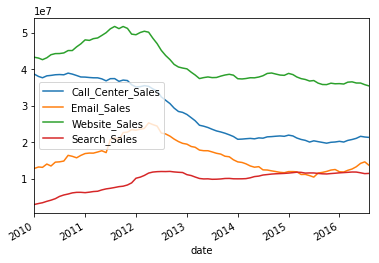

In [34]:
df.plot()
plt.show()


## Not too indicative of any heteroskedasticity, however it looks like maybe adding in some lags and differences (ARMA) will help get rid of any biasing.

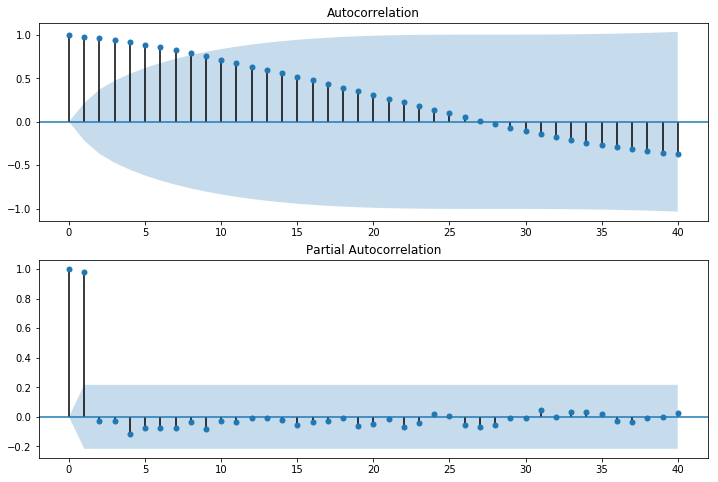

(-1.3550546317736285, 0.60362393006082293, 3, 78, {'5%': -2.8993754262546574, '1%': -3.5171136048315041, '10%': -2.5869547797501644}, 1976.2720500052419)
                              ARIMA Model Results                               
Dep. Variable:     D2.Call_Center_Sales   No. Observations:                   80
Model:                   ARIMA(7, 2, 0)   Log Likelihood               -1142.460
Method:                         css-mle   S.D. of innovations         383378.103
Date:                  Mon, 16 Oct 2017   AIC                           2302.920
Time:                          12:50:52   BIC                           2324.358
Sample:                      03-01-2010   HQIC                          2311.515
                           - 08-01-2016                                         
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
const   

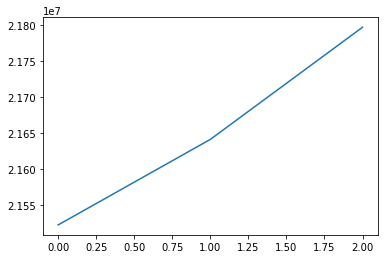

In [35]:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.Call_Center_Sales.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.Call_Center_Sales, lags=40, ax=ax2)
plt.show()

print(sm.tsa.stattools.adfuller(df.Call_Center_Sales))

model=sm.tsa.ARIMA(endog=df['Call_Center_Sales'],order=(7,2,0))
results=model.fit()
print(results.summary())

forecast,std,conf=results.forecast(3)
plt.plot(forecast)

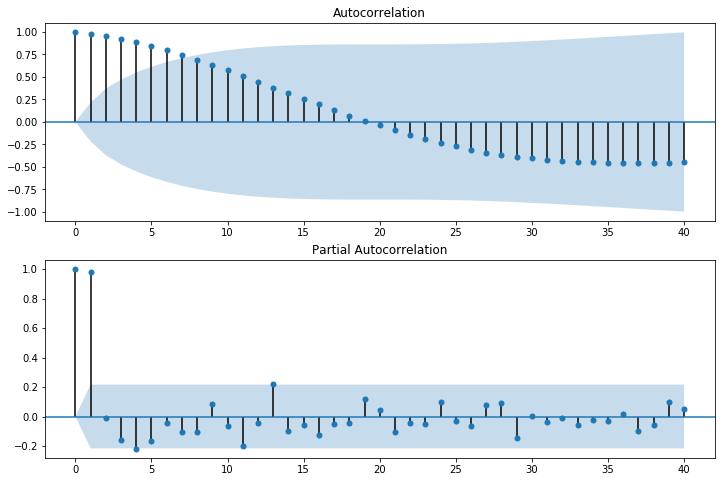

(-1.2972303535020673, 0.63043847578176049, 3, 78, {'5%': -2.8993754262546574, '1%': -3.5171136048315041, '10%': -2.5869547797501644}, 2057.9691868236678)
                             ARIMA Model Results                              
Dep. Variable:         D2.Email_Sales   No. Observations:                   80
Model:                 ARIMA(7, 2, 0)   Log Likelihood               -1189.461
Method:                       css-mle   S.D. of innovations         687912.656
Date:                Mon, 16 Oct 2017   AIC                           2396.922
Time:                        12:50:53   BIC                           2418.360
Sample:                    03-01-2010   HQIC                          2405.517
                         - 08-01-2016                                         
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                -1.691e+04   2.

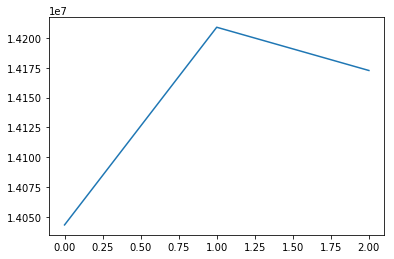

In [36]:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.Email_Sales.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.Email_Sales, lags=40, ax=ax2)
plt.show()

print(statsmodels.tsa.stattools.adfuller(df.Email_Sales))

model=sm.tsa.ARIMA(endog=df['Email_Sales'],order=(7,2,0))
results=model.fit()
print(results.summary())

forecast2,std2,conf2=results.forecast(3)
plt.plot(forecast2)

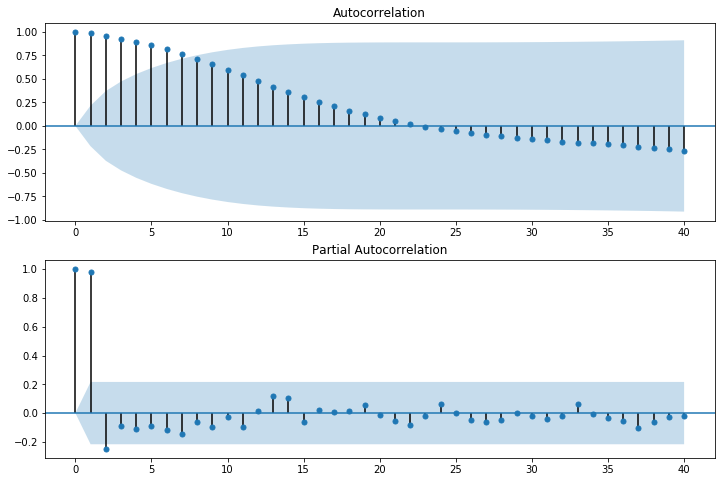

(-0.74612090849904111, 0.83443888297067703, 1, 80, {'5%': -2.8984085156250003, '1%': -3.5148692050781247, '10%': -2.5864389062500002}, 2010.5414859449666)
                             ARIMA Model Results                              
Dep. Variable:       D2.Website_Sales   No. Observations:                   80
Model:                 ARIMA(7, 2, 0)   Log Likelihood               -1164.900
Method:                       css-mle   S.D. of innovations         508197.594
Date:                Mon, 16 Oct 2017   AIC                           2347.799
Time:                        12:51:08   BIC                           2369.237
Sample:                    03-01-2010   HQIC                          2356.394
                         - 08-01-2016                                         
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
const                  -1505.71

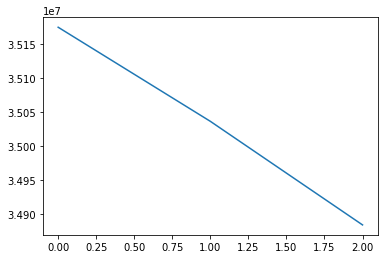

In [38]:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.Website_Sales.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.Website_Sales, lags=40, ax=ax2)
plt.show()

print(statsmodels.tsa.stattools.adfuller(df.Website_Sales))

model=sm.tsa.ARIMA(endog=df['Website_Sales'],order=(7,2,0))
results=model.fit()
print(results.summary())
forecast3,std3,conf3=results.forecast(3)
plt.plot(forecast3)

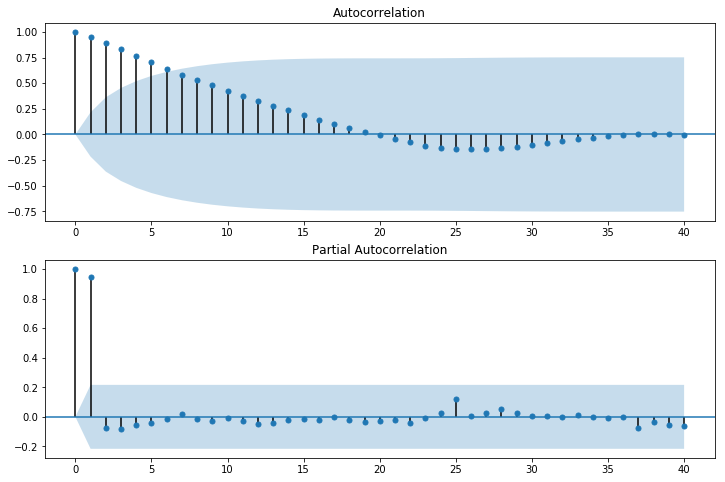

(-3.7178506916456744, 0.003868960375169035, 12, 69, {'5%': -2.9044395987933362, '1%': -3.528889992207215, '10%': -2.5896556542743121}, 1865.462020250118)
                             ARIMA Model Results                              
Dep. Variable:        D2.Search_Sales   No. Observations:                   80
Model:                 ARIMA(7, 2, 0)   Log Likelihood               -1081.567
Method:                       css-mle   S.D. of innovations         179367.941
Date:                Mon, 16 Oct 2017   AIC                           2181.134
Time:                        12:51:09   BIC                           2202.572
Sample:                    03-01-2010   HQIC                          2189.729
                         - 08-01-2016                                         
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
const                 -2564.5375  

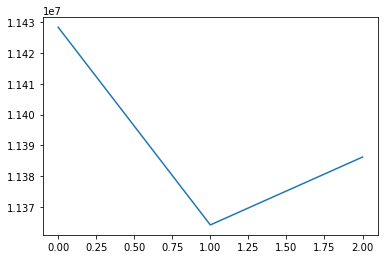

In [39]:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.Search_Sales.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.Search_Sales, lags=40, ax=ax2)
plt.show()

print(statsmodels.tsa.stattools.adfuller(df.Search_Sales))

model=sm.tsa.ARIMA(endog=df['Search_Sales'],order=(7,2,0))
results=model.fit()
print(results.summary())

forecast4,std4,conf4=results.forecast(3)
plt.plot(forecast4)

# Below I have the prediction for my month 80, and then 81 and 82. I used a pretty basic model, so I doubt I captured everything at play here, but it was a fun exercise. 

### I recognize I could have just added the predictions together rather than actually predicting using the model, but I wanted to practice my statistical programming.

In [43]:

res = mod.fit()
res.predict(exog=dict(Call_Center_Sales=forecast[0],Email_Sales=forecast2[0],Website_Sales=forecast3[0],Search_Sales=forecast4[0]))


array([ 82168702.51802677])

In [44]:
res.predict(exog=dict(Call_Center_Sales=forecast,Email_Sales=forecast2,Website_Sales=forecast3,Search_Sales=forecast4))


array([ 82168702.51802677,  82250787.84289345,  82239980.25506881])